In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv("chd-201015-202131.csv")

df.head()


,Obs,ID,AGE,agrp,CHD
0,1,1,20,1,0
1,2,2,23,1,0
2,3,3,24,1,0
3,4,4,25,1,0
4,5,5,25,1,1


In [4]:
X = df.drop(['Obs', 'ID', 'CHD'], axis=1)
y = df['CHD']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
model = MLPClassifier(
    hidden_layer_sizes=(16, 8),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500, random_state=42)

In [8]:
y_pred = model.predict(X_test)


In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6


In [10]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[8 3]
 [5 4]]


In [11]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



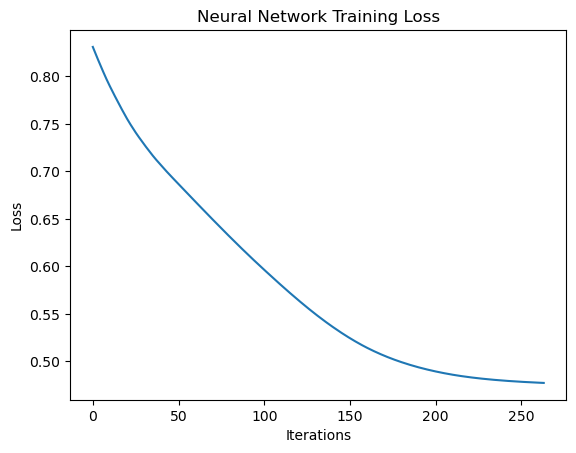

In [12]:
import matplotlib.pyplot as plt

plt.plot(model.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Neural Network Training Loss")
plt.show()
